In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import requests
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import io

In [ ]:
# Functions that possiblely useful
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST


# The dataframe passed to VIF must include the intercept term.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)



def import_csv_from_url(file_url):
    # Extract file ID from URL
    file_id = file_url.split('/')[-2]

    # Construct download URL for file
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Download CSV file and create DataFrame
    response = requests.get(download_url)
    content = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(content))

    return df


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data importing for 7, 30, 60 Days Predictions using URL
PS:df which has testset in title is the data from 2019-01-01 to 2023-05-03

In [ ]:
stock_data7day=import_csv_from_url("https://drive.google.com/file/d/1WYkUQM2F7K5Dy5cNiSCjzCRsstjEZuyn/view?usp=share_link")
stock_data7day.head(5)

,Date,Open,High,Low,Close,Volume,Adjusted_Close,vix_Open,vix_High,vix_Low,...,MACD_Signal,MACD_Hist,%K,%D,ROC,OBV,Williams %R,Price_7_days,Close_Price_Change,Price_7_days_Status
0,2/22/10,200.947759,202.379443,199.021739,200.779420,16897487.81,6.102386,22.183421,22.769144,21.149518,...,1.541386,-4.823800,64.867188,52.157014,2.040661,-206307243.7,-20.636615,205.913700,5.134281,1
1,2/23/10,200.710809,202.117071,198.193769,199.849275,17807929.44,6.074116,21.735047,22.561849,20.877127,...,1.433913,-4.465322,71.912721,62.765477,1.910569,-224115173.1,-28.980129,207.112782,7.263507,1
2,2/24/10,200.090587,201.947798,198.105324,200.050963,17468136.28,6.080246,21.608781,22.316379,20.712840,...,1.344964,-4.129081,74.571075,70.450328,2.002045,-206647036.9,-26.670032,210.072099,10.021136,1
3,2/25/10,199.412924,202.175854,197.801486,200.538234,19039764.67,6.095056,21.714088,22.407287,20.549626,...,1.287447,-3.807219,74.420310,73.634702,2.382162,-187607272.2,-21.088910,212.324082,11.785848,1
4,2/26/10,200.154706,202.924404,198.851133,201.558694,18810719.41,6.126071,21.255558,21.937957,20.242214,...,1.283740,-3.486284,79.125546,76.038977,2.536879,-168796552.8,-14.864421,214.998067,13.439374,1


In [ ]:
stock_data30day=import_csv_from_url("https://drive.google.com/file/d/1mKLqA0JoSXCTZhIAC15MGfiXh3vIJIgo/view?usp=share_link")
stock_data60day=import_csv_from_url("https://drive.google.com/file/d/1TuYQDOWroxMCgAumvuTI1er_2uyOBLlf/view?usp=share_link")

In [ ]:
stock_data7day.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted_Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj_Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj_Close', 'nasdaq_Volume', 'RSI', 'MACD',
       'MACD_Signal', 'MACD_Hist', '%K', '%D', 'ROC', 'OBV', 'Williams %R',
       'Price_7_days', 'Close_Price_Change', 'Price_7_days_Status'],
      dtype='object')

In [ ]:
'''file_url30 = "https://drive.google.com/file/d/1mKLqA0JoSXCTZhIAC15MGfiXh3vIJIgo/view?usp=share_link"


file_id30 = file_url30.split('/')[-2]

download_url30 = f'https://drive.google.com/uc?id={file_id30}'


stock_data30day = pd.read_csv(download_url30, error_bad_lines=False)

file_url60 = "https://drive.google.com/file/d/1TuYQDOWroxMCgAumvuTI1er_2uyOBLlf/view?usp=share_link"


file_id60 = file_url60.split('/')[-2]

download_url60 = f'https://drive.google.com/uc?id={file_id60}'
stock_data60day = pd.read_csv(download_url60, error_bad_lines=False)'''

'file_url30 = "https://drive.google.com/file/d/1mKLqA0JoSXCTZhIAC15MGfiXh3vIJIgo/view?usp=share_link"\n\n\nfile_id30 = file_url30.split(\'/\')[-2]\n\ndownload_url30 = f\'https://drive.google.com/uc?id={file_id30}\'\n\n\nstock_data30day = pd.read_csv(download_url30, error_bad_lines=False)\n\nfile_url60 = "https://drive.google.com/file/d/1TuYQDOWroxMCgAumvuTI1er_2uyOBLlf/view?usp=share_link"\n\n\nfile_id60 = file_url60.split(\'/\')[-2]\n\ndownload_url60 = f\'https://drive.google.com/uc?id={file_id60}\'\nstock_data60day = pd.read_csv(download_url60, error_bad_lines=False)'

In [ ]:
testset_7day=import_csv_from_url("https://drive.google.com/file/d/1RZdAtKW2MW01xjeNYl6rFpYHqbMjmIE7/view?usp=sharing")

In [ ]:
testset_30day=import_csv_from_url("https://drive.google.com/file/d/1YmBHanoooWBj3du1ecmHEpbB8M6qn_1B/view?usp=sharing")

In [ ]:
testset_60day=import_csv_from_url("https://drive.google.com/file/d/1ndjXi5nqqjlIDxUEGUFbg476rSkDxBT7/view?usp=sharing")

## Feature selection via VIF indicators

In [ ]:
# Calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols = ['Volume', 'vix_Close', 'nasdaq_Close', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', '%K', '%D', 'ROC', 'OBV', 'Williams %R']
VIF(stock_data7day, cols)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Volume            1.767013
vix_Close         1.716023
nasdaq_Close     15.285634
RSI              14.405735
MACD                   inf
MACD_Signal            inf
MACD_Hist              inf
%K              316.001003
%D              110.720963
ROC               7.814812
OBV              11.421134
Williams %R      86.648762
dtype: float64

In [ ]:
# Only select features with VIF lower than 10
cols = ['Volume','vix_Close', 'RSI','MACD', '%D', 'ROC', 'OBV']
VIF(stock_data7day, cols)

Volume       1.385025
vix_Close    1.256017
RSI          8.698746
MACD         3.161920
%D           6.647207
ROC          4.611774
OBV          1.547102
dtype: float64

Build the test and training set of three datasets.

In [ ]:
y = stock_data7day['Price_7_days_Status']
X = stock_data7day[['Volume','vix_Close','RSI','MACD', '%D', 'ROC', 'OBV']]
y_19_7day = testset_7day['Price_7_days_Status']
X_19_7day = testset_7day[['Volume','vix_Close','RSI','MACD', '%D', 'ROC', 'OBV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape, X_19_7day.shape

((1556, 7), (668, 7), (1060, 7))

In [ ]:
y = stock_data30day['Price_30_days_Status']
X = stock_data30day[['Volume','vix_Close','RSI','MACD', '%D', 'ROC', 'OBV']]
y_19_30day = testset_30day['Price_30_days_Status']
X_19_30day = testset_30day[['Volume','vix_Close','RSI','MACD', '%D', 'ROC', 'OBV']]

X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.3, random_state=88)

In [ ]:
y = stock_data60day['Price_60_days_Status']
X = stock_data60day[['Volume', 'vix_Close', 'RSI','MACD', '%D', 'ROC', 'OBV']]
y_19_60day = testset_60day['Price_60_days_Status']
X_19_60day = testset_60day[['Volume','vix_Close','RSI','MACD', '%D', 'ROC', 'OBV']]
X_train60, X_test60, y_train60, y_test60 = train_test_split(X, y, test_size=0.3, random_state=88)

X_19_60day.head()

,Volume,vix_Close,RSI,MACD,%D,ROC,OBV
0,2.336423e+07,15.502037,88.641823,5.404339,93.251220,3.935019,5.628781e+08
1,2.405179e+07,15.131507,89.119484,5.274997,93.224109,2.581771,5.869299e+08
2,2.235121e+07,14.963623,89.200237,5.119008,92.977334,1.441372,6.092811e+08
3,2.149167e+07,14.600206,89.828316,4.980646,92.380518,1.377057,6.307728e+08
4,2.158710e+07,14.662656,90.618928,4.872252,91.424826,1.594445,6.523599e+08


# **Ada Boosting classification with CV**

In [ ]:
# cross validation
#This is the output
#Best Parameters: {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 250}
#Best Cross-Validation Score: 86.82%
#the cross volidation code iterate 400 fits and thus takes long time (15 minutes) to run, in order to save time for people who want to run the model, I comment them.

In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create a base estimator (decision tree)
base_estimator = DecisionTreeClassifier(random_state=88)

# Create an AdaBoost classifier with the base estimator
abc = AdaBoostClassifier(base_estimator=base_estimator, random_state=88)

# Define hyperparameters to search
parameters = {
    'base_estimator__max_depth': [i for i in range(2, 11, 2)],
    'base_estimator__min_samples_leaf': [5, 10],
    'n_estimators': [10, 50, 250, 1000],
    'learning_rate': [0.01,0.1]
}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(abc, parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score: {:.2f}%".format(best_score * 100))
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Create a base estimator (decision tree)\nbase_estimator = DecisionTreeClassifier(random_state=88)\n\n# Create an AdaBoost classifier with the base estimator\nabc = AdaBoostClassifier(base_estimator=base_estimator, random_state=88)\n\n# Define hyperparameters to search\nparameters = {\n    \'base_estimator__max_depth\': [i for i in range(2, 11, 2)],\n    \'base_estimator__min_samples_leaf\': [5, 10],\n    \'n_estimators\': [10, 50, 250, 1000],\n    \'learning_rate\': [0.01,0.1]\n}\n\n# Perform cross-validation with GridSearchCV\ngrid_search = GridSearchCV(abc, parameters, scoring=\'accuracy\', cv=5, verbose=1, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and corresponding score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("B

#build adaboost model for 7 days prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

best_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=88),
                              learning_rate=0.1, n_estimators=250, random_state=88)
best_abc.fit(X_train, y_train)

# Predict on test data
y_pred = best_abc.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)

cm_7 = confusion_matrix(y_test, y_pred)
acc_7 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

# Evaluate the model using recent data
y_pred_19=best_abc.predict(X_19_7day)
accuracy_19 = accuracy_score(y_19_7day, y_pred_19)
cm_19 = confusion_matrix(y_19_7day, y_pred_19)

# Prediction of data from 2019-present
print("For data strating from 2019: ")
print("Accuracy: {:.2f}%".format(accuracy_19 * 100))
print("\nClassification Report:")
print(classification_report(y_19_7day, y_pred_19))
print("\nConfusion Matrix:")
print(cm_19)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 88.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       272
           1       0.91      0.90      0.91       396

    accuracy                           0.89       668
   macro avg       0.88      0.88      0.88       668
weighted avg       0.89      0.89      0.89       668


Confusion Matrix:
[[235  37]
 [ 38 358]]


For data strating from 2019: 
Accuracy: 63.49%

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.31      0.37       367
           1       0.69      0.81      0.74       693

    accuracy                           0.63      1060
   macro avg       0.57      0.56      0.56      1060
weighted avg       0.61      0.63      0.61      1060


Confusion Matrix:
[[112 255]
 [132 561]]


In [ ]:
# Build adaboosting model for 30 days prediction.

In [ ]:
'''
#CV for 30 days data
# Create a base estimator (decision tree)
base_estimator = DecisionTreeClassifier(random_state=88)

# Create an AdaBoost classifier with the base estimator
abc = AdaBoostClassifier(base_estimator=base_estimator, random_state=88)

# Define hyperparameters to search
parameters = {
    'base_estimator__max_depth': [i for i in range(2, 11, 2)],
    'base_estimator__min_samples_leaf': [5, 10],
    'n_estimators': [10, 50, 250, 1000],
    'learning_rate': [0.01,0.1]
}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(abc, parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train30, y_train30)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score: {:.2f}%".format(best_score * 100))
'''
#following is the output.
#Best Parameters: {'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 1000}
#Best Cross-Validation Score: 97.50%

In [ ]:
best_abc30 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=88),
                              learning_rate=0.1, n_estimators=100, random_state=88)
best_abc30.fit(X_train30, y_train30)

# Predict on test data
y_pred = best_abc30.predict(X_test30)

# Model evaluation
accuracy30 = accuracy_score(y_test30, y_pred)
print("For test set data: ")
print("Accuracy: {:.2f}%".format(accuracy30 * 100))
print("\nClassification Report:")
print(classification_report(y_test30, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test30, y_pred))
print("\n")
cm_30 = confusion_matrix(y_test30, y_pred)


# Evaluate the model using recent data
y_pred_19_30day=best_abc30.predict(X_19_30day)
accuracy_19_30day = accuracy_score(y_19_30day, y_pred_19_30day)
cm_19_30day = confusion_matrix(y_19_30day, y_pred_19_30day)

# Prediction of data from 2019-present
print("For data strating from 2019: ")
print("Accuracy: {:.2f}%".format(accuracy_19_30day * 100))
print("\nClassification Report:")
print(classification_report(y_19_30day, y_pred_19_30day))
print("\nConfusion Matrix:")
print(cm_19_30day)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


For test set data: 
Accuracy: 95.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       224
           1       0.96      0.98      0.97       446

    accuracy                           0.96       670
   macro avg       0.96      0.95      0.95       670
weighted avg       0.96      0.96      0.96       670


Confusion Matrix:
[[204  20]
 [  8 438]]


For data from 2019: 
Accuracy: 63.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.18      0.24       336
           1       0.69      0.85      0.76       724

    accuracy                           0.64      1060
   macro avg       0.53      0.52      0.50      1060
weighted avg       0.59      0.64      0.60      1060


Confusion Matrix:
[[ 61 275]
 [108 616]]


In [ ]:
#ada boosting model and cv for 60 days
#cv output is:
#Best Parameters: {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 250}
#Best Cross-Validation Score: 99.10%

In [ ]:
#CV for 60 days data
# Create a base estimator (decision tree)
'''base_estimator = DecisionTreeClassifier(random_state=88)

# Create an AdaBoost classifier with the base estimator
abc = AdaBoostClassifier(base_estimator=base_estimator, random_state=88)

# Define hyperparameters to search
parameters = {
    'base_estimator__max_depth': [i for i in range(2, 11, 2)],
    'base_estimator__min_samples_leaf': [5, 10],
    'n_estimators': [10, 50, 250, 1000],
    'learning_rate': [0.01,0.1]
}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(abc, parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train60, y_train60)

# Get the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score: {:.2f}%".format(best_score * 100))'''

In [ ]:
# Adaboosting model for 60 days prediction.
best_abc60 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=88),
                              learning_rate=0.1, n_estimators=250, random_state=88)
best_abc60.fit(X_train60, y_train60)

# Predict on test data
y_pred = best_abc60.predict(X_test60)

# Model evaluation
accuracy60 = accuracy_score(y_test60, y_pred)
print("Accuracy: {:.2f}%".format(accuracy60 * 100))
print("\nClassification Report:")
print(classification_report(y_test60, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test60, y_pred))
print("\n")
cm_60 = confusion_matrix(y_test60, y_pred)

#evaluate the model using recent data
y_pred_19_60day=best_abc60.predict(X_19_60day)
accuracy_19_60day = accuracy_score(y_19_60day, y_pred_19_60day)
cm_19_60day = confusion_matrix(y_19_60day, y_pred_19_60day)

# prediction of data from 2019-present
print("For data strating from 2019: ")
print("Accuracy: {:.2f}%".format(accuracy_19_60day * 100))
print("\nClassification Report:")
print(classification_report(y_19_60day, y_pred_19_60day))
print("\nConfusion Matrix:")
print(cm_19_60day)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 98.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       158
           1       0.98      1.00      0.99       512

    accuracy                           0.99       670
   macro avg       0.99      0.97      0.98       670
weighted avg       0.99      0.99      0.98       670


Confusion Matrix:
[[150   8]
 [  2 510]]


For data strating from 2019: 
Accuracy: 65.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.32      0.34       293
           1       0.75      0.78      0.76       767

    accuracy                           0.65      1060
   macro avg       0.55      0.55      0.55      1060
weighted avg       0.64      0.65      0.65      1060


Confusion Matrix:
[[ 93 200]
 [169 598]]


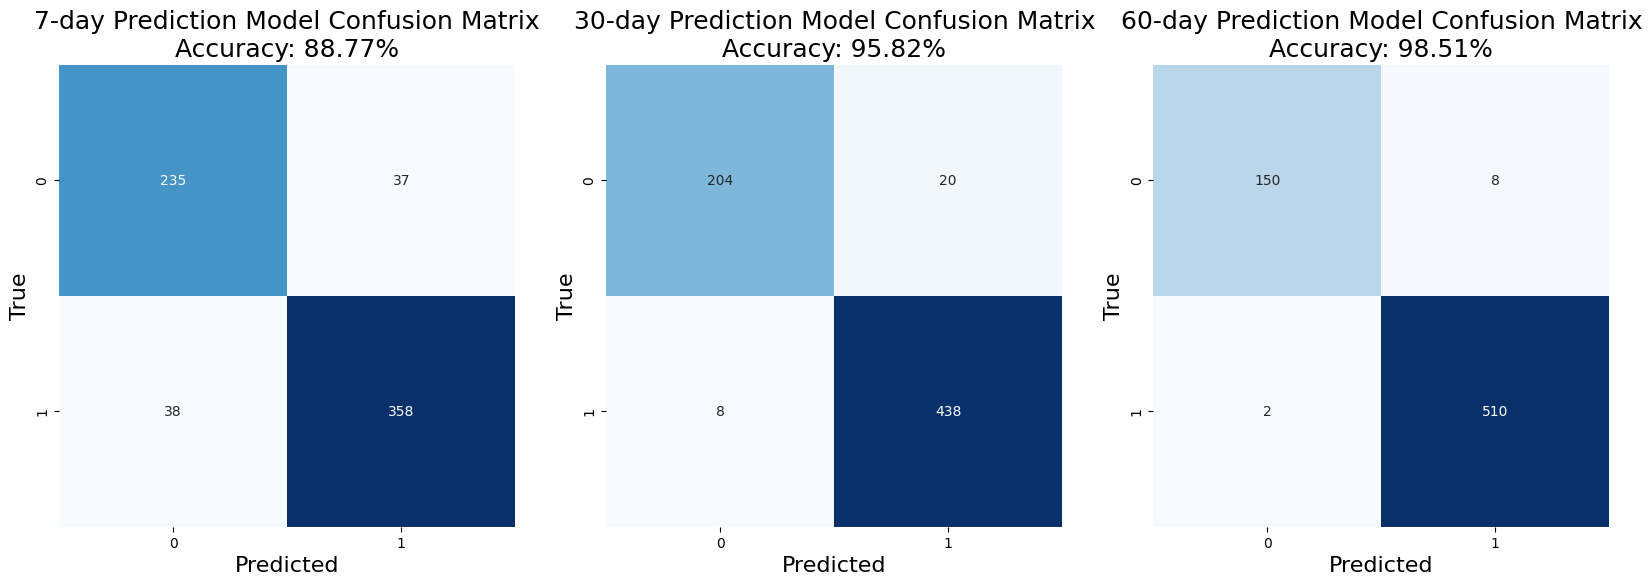

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_7, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title("7-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy * 100), fontsize=18)
axs[0].set_xlabel("Predicted", fontsize=16)
axs[0].set_ylabel("True", fontsize=16)

sns.heatmap(cm_30, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_title("30-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy30 * 100), fontsize=18)
axs[1].set_xlabel("Predicted", fontsize=16)
axs[1].set_ylabel("True", fontsize=16)

sns.heatmap(cm_60, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
axs[2].set_title("60-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy60 * 100), fontsize=18)
axs[2].set_xlabel("Predicted", fontsize=16)
axs[2].set_ylabel("True", fontsize=16)

plt.show()

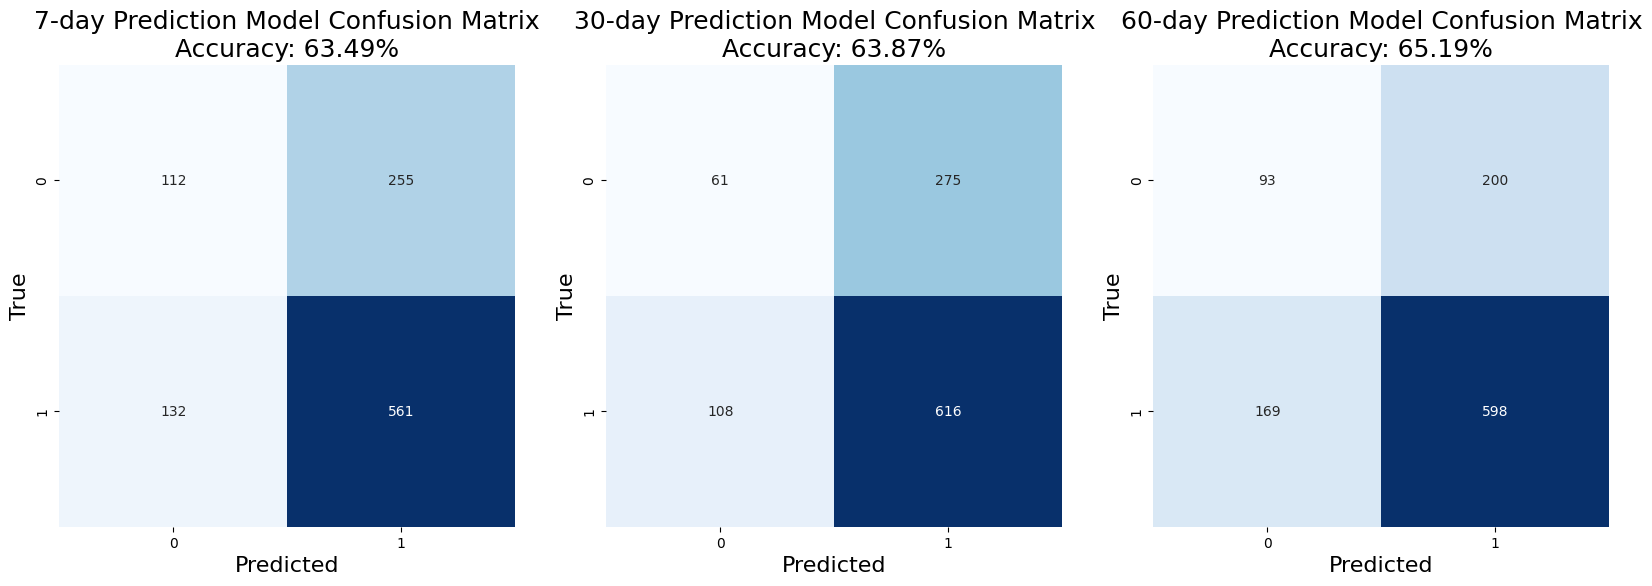

In [ ]:
# Plot confusion matrices of predition of data from 2019 to present
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_19, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title("7-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy_19 * 100), fontsize=18)
axs[0].set_xlabel("Predicted", fontsize=16)
axs[0].set_ylabel("True", fontsize=16)

sns.heatmap(cm_19_30day, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_title("30-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy_19_30day * 100), fontsize=18)
axs[1].set_xlabel("Predicted", fontsize=16)
axs[1].set_ylabel("True", fontsize=16)

sns.heatmap(cm_19_60day, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
axs[2].set_title("60-day Prediction Model Confusion Matrix\nAccuracy: {:.2f}%".format(accuracy_19_60day * 100), fontsize=18)
axs[2].set_xlabel("Predicted", fontsize=16)
axs[2].set_ylabel("True", fontsize=16)

plt.show()

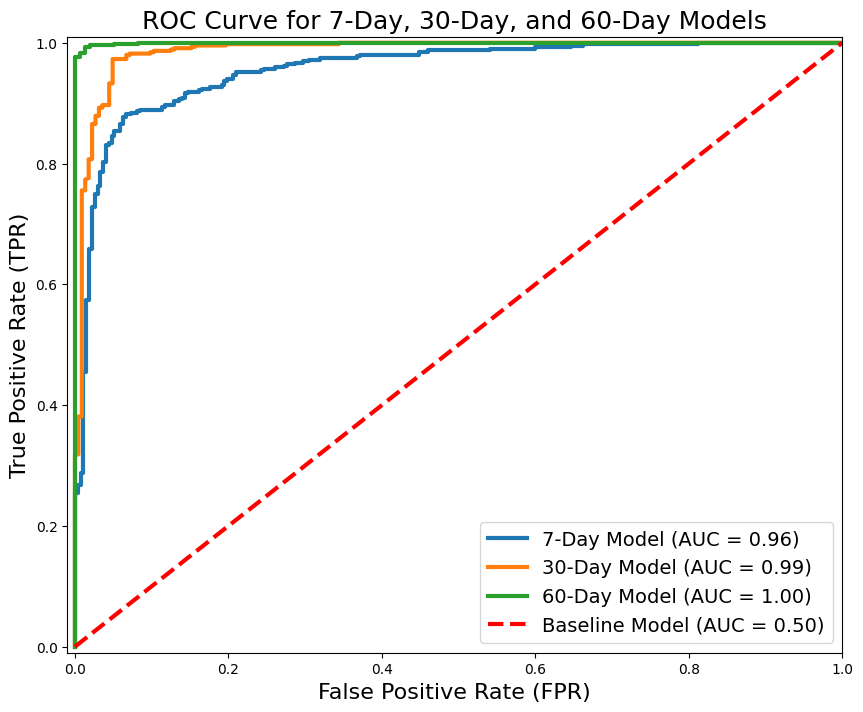

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_prob = best_abc.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate the probabilities for the positive class for each model
y_prob_30 = best_abc30.predict_proba(X_test30)[:, 1]
y_prob_60 = best_abc60.predict_proba(X_test60)[:, 1]

# Compute FPR, TPR, and ROC AUC for each model
fpr30, tpr30, _ = roc_curve(y_test30, y_prob_30)
roc_auc30 = auc(fpr30, tpr30)

fpr60, tpr60, _ = roc_curve(y_test60, y_prob_60)
roc_auc60 = auc(fpr60, tpr60)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=3, label='7-Day Model (AUC = {:0.2f})'.format(roc_auc))
plt.plot(fpr30, tpr30, lw=3, label='30-Day Model (AUC = {:0.2f})'.format(roc_auc30))
plt.plot(fpr60, tpr60, lw=3, label='60-Day Model (AUC = {:0.2f})'.format(roc_auc60))
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--', label='Baseline Model (AUC = 0.50)')
plt.title('ROC Curve for 7-Day, 30-Day, and 60-Day Models', fontsize=18)
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=14)
plt.show()

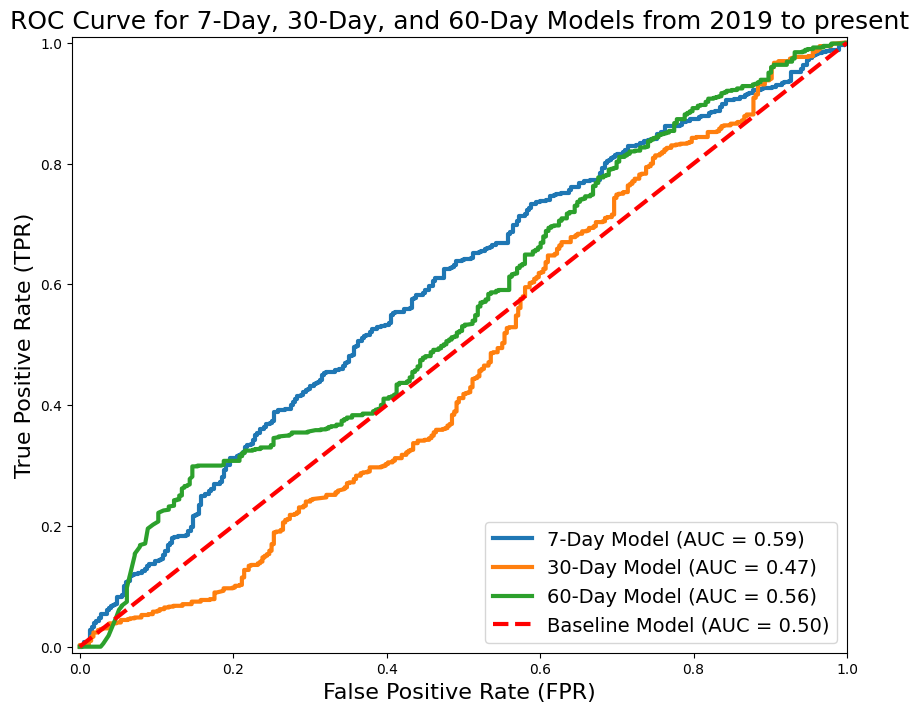

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Recalculate the probabilities for the positive class using recent years data
y_prob = best_abc.predict_proba(X_19_7day)[:, 1]
y_prob_30 = best_abc30.predict_proba(X_19_30day)[:, 1]
y_prob_60 = best_abc60.predict_proba(X_19_60day)[:, 1]

# Compute FPR, TPR, and ROC AUC
fpr, tpr, _ = roc_curve(y_19_7day, y_prob)
roc_auc = auc(fpr, tpr)

# Compute FPR, TPR, and ROC AUC for each model
fpr30, tpr30, _ = roc_curve(y_19_30day, y_prob_30)
roc_auc30 = auc(fpr30, tpr30)

fpr60, tpr60, _ = roc_curve(y_19_60day, y_prob_60)
roc_auc60 = auc(fpr60, tpr60)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=3, label='7-Day Model (AUC = {:0.2f})'.format(roc_auc))
plt.plot(fpr30, tpr30, lw=3, label='30-Day Model (AUC = {:0.2f})'.format(roc_auc30))
plt.plot(fpr60, tpr60, lw=3, label='60-Day Model (AUC = {:0.2f})'.format(roc_auc60))
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--', label='Baseline Model (AUC = 0.50)')
plt.title('ROC Curve for 7-Day, 30-Day, and 60-Day Models from 2019 to present', fontsize=18)
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=14)
plt.show()

#The end of adaboost model.